# Survival analysis using Logistic regression: HCC Survival Data Set

## Setting up: Install required packages

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from pandas.plotting import radviz
from sklearn.metrics import confusion_matrix
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

### Read the data file

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\bjnis\\Downloads\\a07\\a07\\cs6010_fa2019_a07_g04\\notebooks'

In [4]:
df_raw = pd.read_csv('../data/hcc-data.txt')

In [5]:
df_raw.sample(5)

1  0  1.1 0.1 0.2 0.3 0.4  1.2 0.5 1.3  ...  150  7.1 0.7.1 1.10  3.5  \
45   0  1    0   0   0   0   0    0   0   0  ...    ?    ?     ?    ?    ?   
142  1  0    1   0   0   0   0    1   0   1  ...  106  7.6  0.52    1  2.1   
159  0  0    1   ?   ?   ?   1    1   0   1  ...  109  7.6   0.7    5    3   
53   1  1    1   0   0   0   1    1   ?   1  ...  397  6.7  0.82    1  2.1   
121  1  1    1   0   0   1   1    1   0   1  ...  363  7.3  0.55    1    4   

    0.5.1 ?.1 ?.2  ?.3 1.11  
45      ?   ?   ?    ?    1  
142   1.1  94  39  344    1  
159     ?   ?   ?    ?    1  
53    5.5  56  27  742    0  
121   1.5  40  12   57    0  

[5 rows x 50 columns]

### Add headers

In [6]:
columns_m = ['gender','symptoms','alcohol','hepatitis b surface antigen','hepatitis b e antigen','hepatitis b core antibody',  'hepatitis c virus antibody','cirrhosis','endemic countries','smoking','diabetes','obesity','hemochromatosis','arterial hypertension','chronic renal insufficiency','human immunodeficiency virus','nonalcoholic steatohepatitis','esophageal varices','splenomegaly','portal hypertension','portal vein thrombosis','liver metastasis','radiological hallmark', 'age', 'grams of alcohol per day','packs of cigarettes per year','performance status','encephalopathy degree','ascites degree','international normalized ratio','alpha-fetoprotein','hemoglobin','mean corpuscular volume','leukocytes','platelets','albumin','total bilirubin','alanine transaminase','aspartate transaminase','gamma glutamyl transferase','alkaline phosphatase','total proteins','creatinine','number of nodules','major dimension of nodule cm','direct bilirubin mg/dL','iron','oxygen saturation %','ferritin','class_attribute']

In [7]:
df= pd.read_csv('../data/hcc-data.txt',names=columns_m)

In [8]:
df.columns

Index(['gender', 'symptoms', 'alcohol', 'hepatitis b surface antigen',
       'hepatitis b e antigen', 'hepatitis b core antibody',
       'hepatitis c virus antibody', 'cirrhosis', 'endemic countries',
       'smoking', 'diabetes', 'obesity', 'hemochromatosis',
       'arterial hypertension', 'chronic renal insufficiency',
       'human immunodeficiency virus', 'nonalcoholic steatohepatitis',
       'esophageal varices', 'splenomegaly', 'portal hypertension',
       'portal vein thrombosis', 'liver metastasis', 'radiological hallmark',
       'age', 'grams of alcohol per day', 'packs of cigarettes per year',
       'performance status', 'encephalopathy degree', 'ascites degree',
       'international normalized ratio', 'alpha-fetoprotein', 'hemoglobin',
       'mean corpuscular volume', 'leukocytes', 'platelets', 'albumin',
       'total bilirubin', 'alanine transaminase', 'aspartate transaminase',
       'gamma glutamyl transferase', 'alkaline phosphatase', 'total proteins',
       '

# Exploratory data analysis(EDA)

### Attribute information:

#### Predictor variables: 

* Gender: nominal
* Symptoms: nominal
* Alcohol: nominal
* Hepatitis B Surface Antigen: nominal
* Hepatitis B e Antigen: nominal
* Hepatitis B Core Antibody: nominal
* Hepatitis C Virus Antibody: nominal
* Cirrhosis : nominal
* Endemic Countries: nominal
* Smoking: nominal
* Diabetes: nominal
* Obesity: nominal
* Hemochromatosis: nominal
* Arterial Hypertension: nominal
* Chronic Renal Insufficiency: nominal
* Human Immunodeficiency Virus: nominal
* Nonalcoholic Steatohepatitis: nominal
* Esophageal Varices: nominal
* Splenomegaly: nominal
* Portal Hypertension: nominal
* Portal Vein Thrombosis: nominal
* Liver Metastasis: nominal
* Radiological Hallmark: nominal
* Age at diagnosis: integer
* Grams of Alcohol per day: continuous
* Packs of cigarets per year: continuous
* Performance Status: ordinal
* Encefalopathy degree: ordinal
* Ascites degree: ordinal
* International Normalised Ratio: continuous
* Alpha-Fetoprotein (ng/mL): continuous
* Haemoglobin (g/dL): continuous
* Mean Corpuscular Volume (fl): continuous
* Leukocytes(G/L): continuous
* Platelets (G/L): continuous
* Albumin (mg/dL): continuous
* Total Bilirubin(mg/dL): continuous
* Alanine transaminase (U/L): continuous
* Aspartate transaminase (U/L): continuous
* Gamma glutamyl transferase (U/L): continuous
* Alkaline phosphatase (U/L): continuous
* Total Proteins (g/dL): continuous
* Creatinine (mg/dL): continuous
* Number of Nodules: integer
* Major dimension of nodule (cm): continuous
* Direct Bilirubin (mg/dL): continuous
* Iron (mcg/dL): continuous
* Oxygen Saturation (%): continuous
* Ferritin (ng/mL): continuous

#### Response variable:
* Class: nominal (1 if patient survives, 0 if patient died)

### Check the dimension and data type of the data set

In [9]:
df.shape

(165, 50)

In [10]:
df.dtypes

gender                             int64
symptoms                          object
alcohol                            int64
hepatitis b surface antigen       object
hepatitis b e antigen             object
hepatitis b core antibody         object
hepatitis c virus antibody        object
cirrhosis                          int64
endemic countries                 object
smoking                           object
diabetes                          object
obesity                           object
hemochromatosis                   object
arterial hypertension             object
chronic renal insufficiency       object
human immunodeficiency virus      object
nonalcoholic steatohepatitis      object
esophageal varices                object
splenomegaly                      object
portal hypertension               object
portal vein thrombosis            object
liver metastasis                  object
radiological hallmark             object
age                                int64
grams of alcohol

In [11]:
df.head()

gender symptoms  alcohol hepatitis b surface antigen hepatitis b e antigen  \
0       1        0        1                           0                     0   
1       0        ?        0                           0                     0   
2       1        0        1                           1                     0   
3       1        1        1                           0                     0   
4       1        1        1                           1                     0   

  hepatitis b core antibody hepatitis c virus antibody  cirrhosis  \
0                         0                          0          1   
1                         0                          1          1   
2                         1                          0          1   
3                         0                          0          1   
4                         1                          0          1   

  endemic countries smoking  ... alkaline phosphatase total proteins  \
0                 0       1  ...                  150            7.1   
1                 ?       ?  ...                    ?              ?   
2                 0       1  ...                  109              7   
3                 0       1  ...                  174            8.1   
4                 0       1  ...                  109            6.9   

  creatinine number of nodules major dimension of nodule cm  \
0        0.7                 1                          3.5   
1          ?                 1                          1.8   
2        2.1                 5                           13   
3       1.11                 2                         15.7   
4        1.8                 1                            9   

  direct bilirubin mg/dL iron oxygen saturation % ferritin class_attribute  
0                    0.5    ?                   ?        ?               1  
1                      ?    ?                   ?        ?               1  
2                    0.1   28                   6       16               1  
3                    0.2    ?                   ?        ?               0  
4                      ?   59                  15       22               1  

[5 rows x 50 columns]

### Summary statistics

In [12]:
summery=df.describe().transpose()
print(summery)

                    count       mean        std   min   25%   50%   75%   max
gender              165.0   0.806061   0.396586   0.0   1.0   1.0   1.0   1.0
alcohol             165.0   0.739394   0.440302   0.0   0.0   1.0   1.0   1.0
cirrhosis           165.0   0.903030   0.296817   0.0   1.0   1.0   1.0   1.0
age                 165.0  64.690909  13.319534  20.0  57.0  66.0  74.0  93.0
performance status  165.0   1.018182   1.181528   0.0   0.0   1.0   2.0   4.0
class_attribute     165.0   0.618182   0.487311   0.0   0.0   1.0   1.0   1.0


## Missing data exploration: highlighting graphical presentation of missing pattern

#### Identifying the reason of “missingness” is very important. Missingness can occur for the following reasons: 
* It was forgotten or lost;
* It was not applicable to the instance;
* It is of no interest to the instance. 

## Exploring missing pattern: Number of missing values vs. number of  non missing values

In [13]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
missing = df.isnull().sum()
print(missing)
df.isnull()

gender                             0
symptoms                          18
alcohol                            0
hepatitis b surface antigen       17
hepatitis b e antigen             39
hepatitis b core antibody         24
hepatitis c virus antibody         9
cirrhosis                          0
endemic countries                 39
smoking                           41
diabetes                           3
obesity                           10
hemochromatosis                   23
arterial hypertension              3
chronic renal insufficiency        2
human immunodeficiency virus      14
nonalcoholic steatohepatitis      22
esophageal varices                52
splenomegaly                      15
portal hypertension               11
portal vein thrombosis             3
liver metastasis                   4
radiological hallmark              2
age                                0
grams of alcohol per day          48
packs of cigarettes per year      53
performance status                 0
e

gender  symptoms  alcohol  hepatitis b surface antigen  \
0     False     False    False                        False   
1     False      True    False                        False   
2     False     False    False                        False   
3     False     False    False                        False   
4     False     False    False                        False   
..      ...       ...      ...                          ...   
160   False     False    False                         True   
161   False     False    False                         True   
162   False     False    False                        False   
163   False     False    False                        False   
164   False     False    False                        False   

     hepatitis b e antigen  hepatitis b core antibody  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                    False                      False   
4                    False                      False   
..                     ...                        ...   
160                   True                       True   
161                   True                       True   
162                  False                      False   
163                  False                      False   
164                  False                      False   

     hepatitis c virus antibody  cirrhosis  endemic countries  smoking  ...  \
0                         False      False              False    False  ...   
1                         False      False               True     True  ...   
2                         False      False              False    False  ...   
3                         False      False              False    False  ...   
4                         False      False              False    False  ...   
..                          ...        ...                ...      ...  ...   
160                       False      False              False    False  ...   
161                        True      False              False    False  ...   
162                       False      False              False    False  ...   
163                       False      False              False    False  ...   
164                       False      False              False    False  ...   

     alkaline phosphatase  total proteins  creatinine  number of nodules  \
0                   False           False       False              False   
1                    True            True        True              False   
2                   False           False       False              False   
3                   False           False       False              False   
4                   False           False       False              False   
..                    ...             ...         ...                ...   
160                 False           False       False              False   
161                 False           False       False              False   
162                 False           False       False              False   
163                 False           False       False              False   
164                 False           False       False              False   

     major dimension of nodule cm  direct bilirubin mg/dL   iron  \
0                           False                   False   True   
1                           False                    True   True   
2                           False                   False  False   
3                           False                   False   True   
4                           False                    True  False   
..                            ...                     ...    ...   
160                         False                    True   True   
161                         False                   False   True   
162                         False                    True   True   
163                  

## Visual presentation of missing data pattern

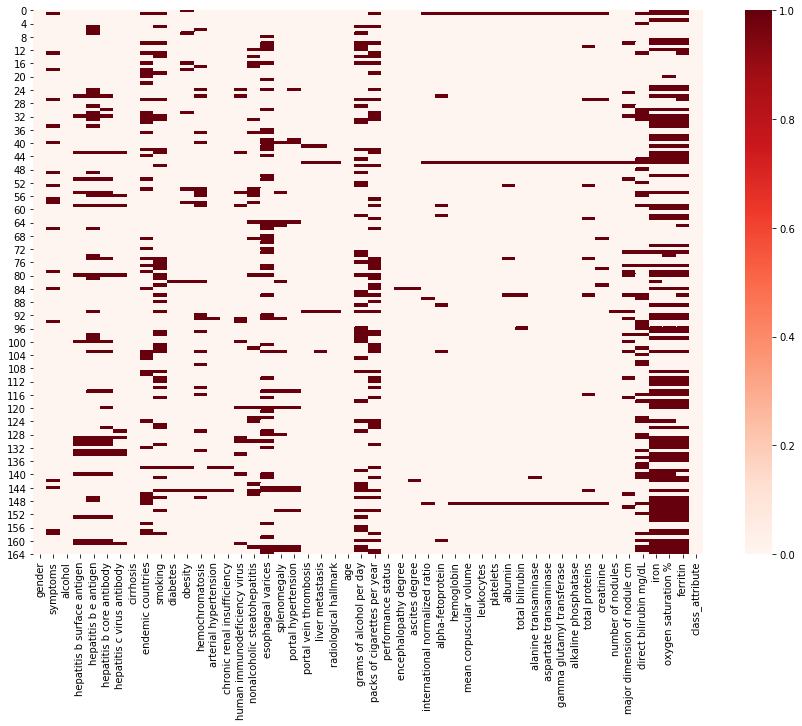

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=True, cmap=plt.cm.Reds)
plt.show()

## Exploration of dependent(response) and predictor variables

Text(0, 0.5, 'Count')

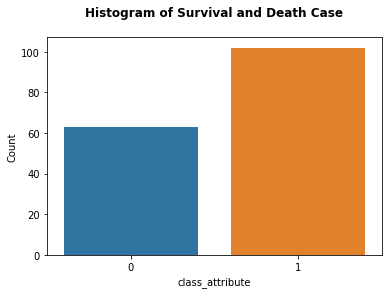

In [15]:
sns.countplot(x='class_attribute', data=df)
plt.title('Histogram of Survival and Death Case\n',fontweight="bold")
plt.xlabel('class_attribute')
plt.ylabel('Count')

#### What percentage of the population die?

In [16]:
df['class_attribute'].value_counts(normalize=True) * 100

1    61.818182
0    38.181818
Name: class_attribute, dtype: float64

#### 38% of the population dies. About 38 out of 100 patients die. 

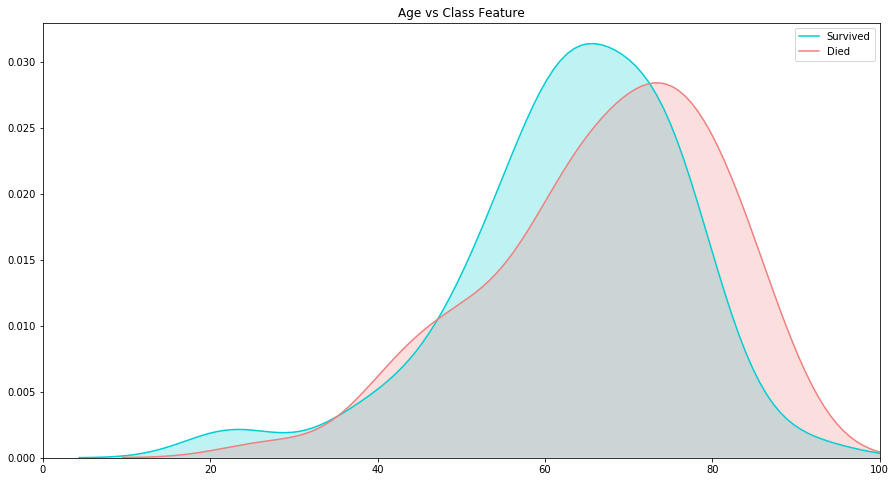

In [17]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.age[df["class_attribute"] == 1], color="darkturquoise",  shade=True)
sns.kdeplot(df.age[df["class_attribute"] == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Age vs Class Feature')
plt.xlim(0,100)
plt.show()

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


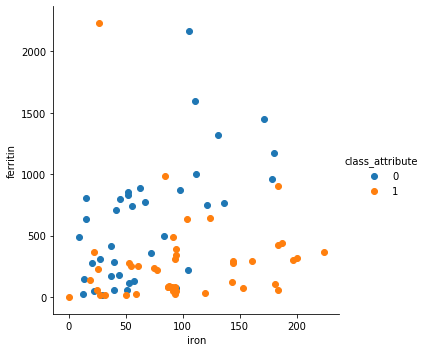

In [18]:
sns.FacetGrid(df,hue="class_attribute", size=5).map(plt.scatter, "iron", "ferritin").add_legend()

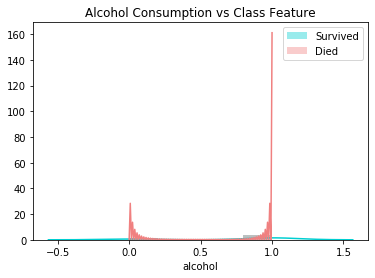

In [19]:
#plt.figure(figsize=(15,8))
sns.distplot(df.alcohol[df["class_attribute"] == 1], color="darkturquoise", bins=5)
sns.distplot(df.alcohol[df["class_attribute"] == 0], color="lightcoral", bins=5)
plt.legend(['Survived', 'Died'])
plt.title('Alcohol Consumption vs Class Feature')
#plt.xlim(0,100)
plt.show()

## Exploration of intercorrelated predictor variables

### Visualize a correlation matrix using seaborn heat map

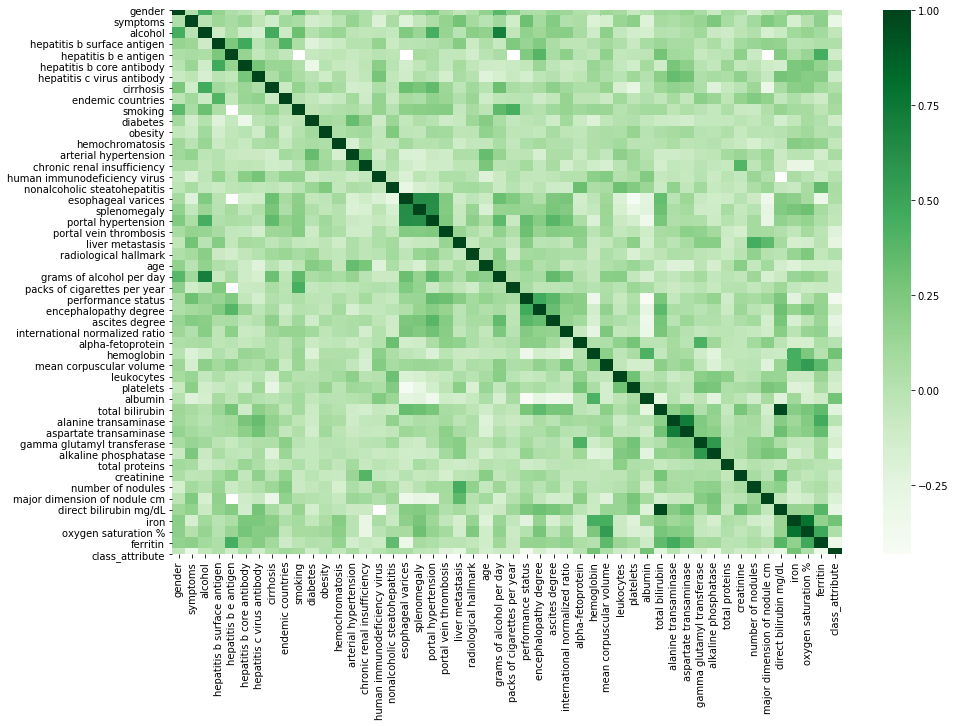

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap=plt.cm.Greens)
plt.show()

#### The positive correlation between variables seems to exist.

### Determine the highly correlated variables

In [21]:
cor_target = abs(df.corr()["class_attribute"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

symptoms                  0.297035
performance status        0.379708
ascites degree            0.261145
hemoglobin                0.292357
albumin                   0.287799
alkaline phosphatase      0.293873
direct bilirubin mg/dL    0.264903
iron                      0.291406
ferritin                  0.321489
class_attribute           1.000000
Name: class_attribute, dtype: float64

#### We see that the response variable class_attribute is correlated with symptoms,performance status,ascites degree,hemoglobin,albumin, alkaline phosphatase, direct bilirubin mg/dL,iron,ferritin

## Visualization of important predictors

c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\users\bjnis\appdata\local\continuum\anaconda3\envs\datascience\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 0.98, 'Visualizing linear relationships among important variables\n')

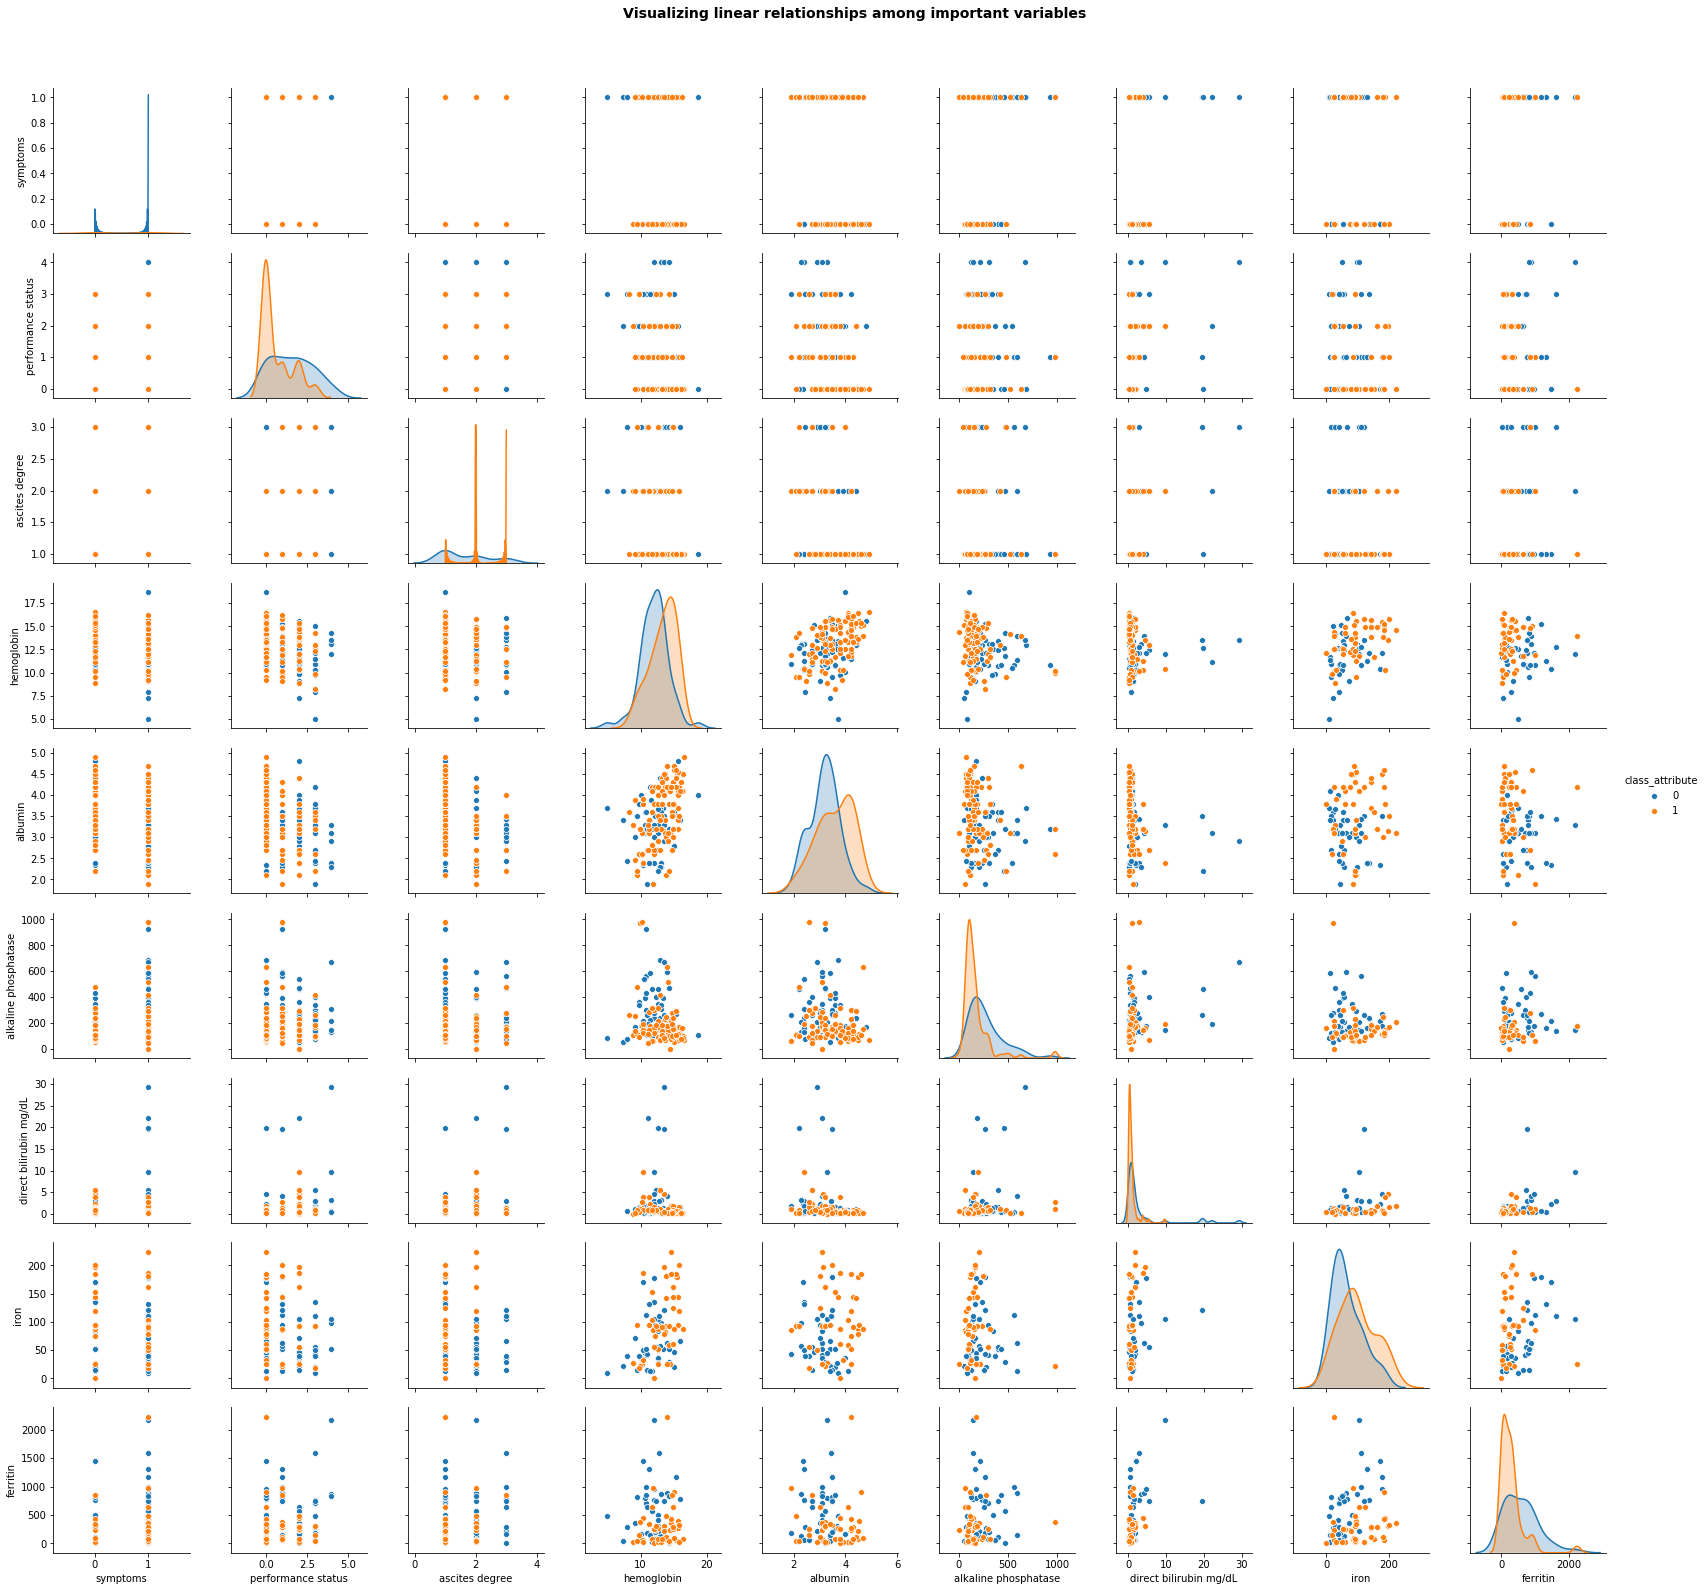

In [22]:
pp=sns.pairplot(df, vars=["symptoms","performance status","ascites degree","hemoglobin","albumin", "alkaline phosphatase", "direct bilirubin mg/dL","iron", "ferritin"], hue="class_attribute")
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Visualizing linear relationships among important variables\n',fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Visualizing linear relationships among important variables\n')

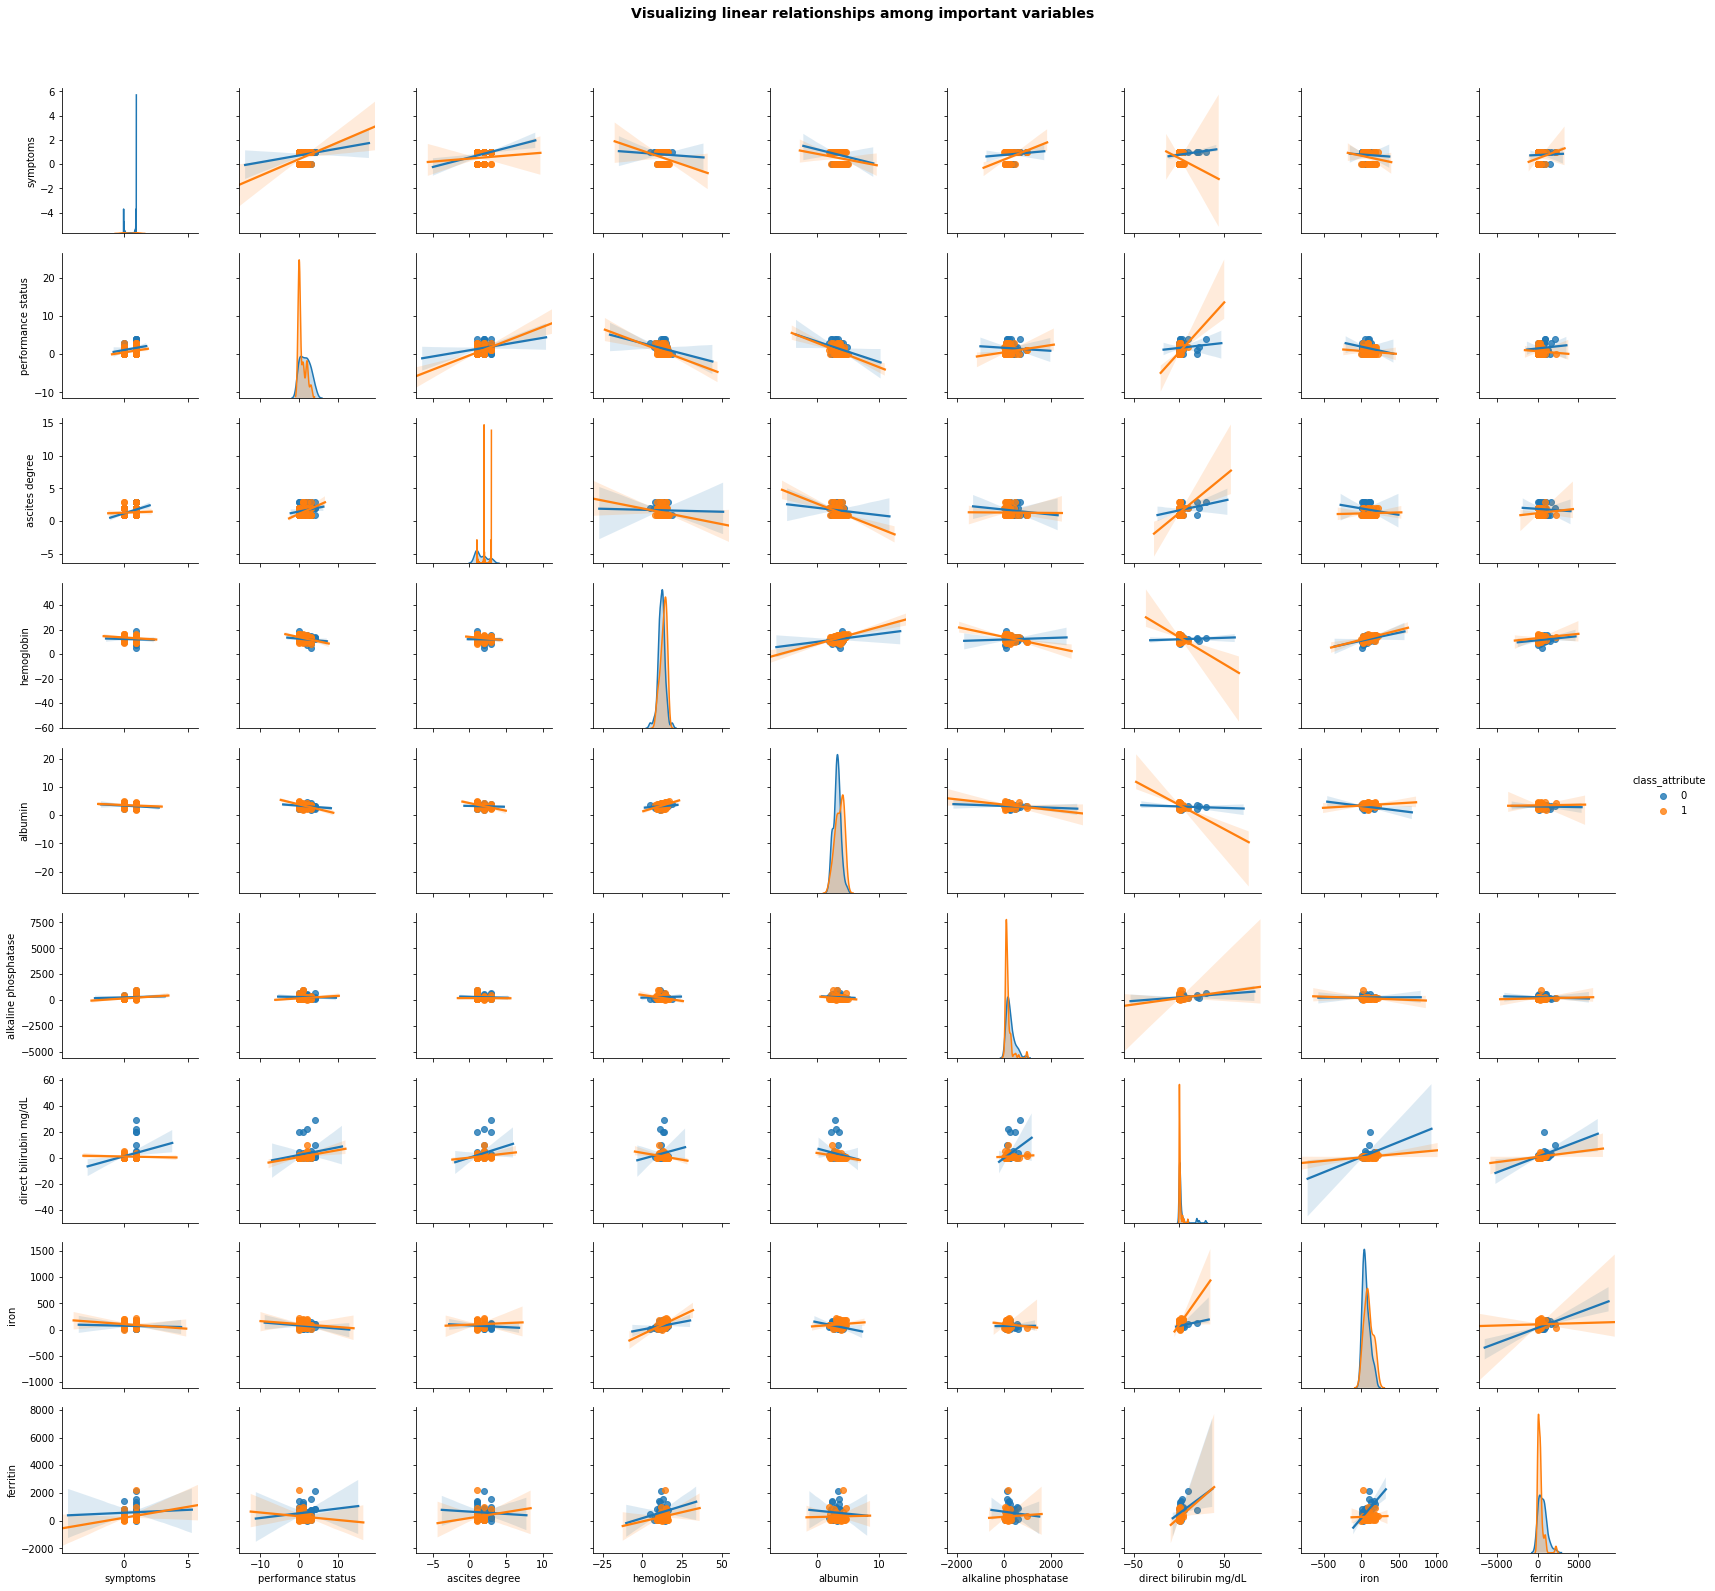

In [23]:
pp=sns.pairplot(df, vars=["symptoms","performance status","ascites degree","hemoglobin","albumin", "alkaline phosphatase", "direct bilirubin mg/dL","iron", "ferritin"],hue="class_attribute", kind="reg")
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Visualizing linear relationships among important variables\n',fontsize=14, fontweight='bold')

### Handling of the missing data

### Impute missing values using mean strategy

In [24]:
imp_mean = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True)
imp_mean.fit(df.values)
mat = imp_mean.transform(df.values)
df1 = pd.DataFrame(mat, columns=df.columns)
df1.sample(5)

gender  symptoms  alcohol  hepatitis b surface antigen  \
58     1.0  0.639456      1.0                          0.0   
74     1.0  1.000000      1.0                          0.0   
67     1.0  1.000000      1.0                          0.0   
18     1.0  0.639456      1.0                          0.0   
97     1.0  0.000000      1.0                          0.0   

    hepatitis b e antigen  hepatitis b core antibody  \
58               0.000000                        0.0   
74               0.007937                        0.0   
67               0.000000                        1.0   
18               0.000000                        0.0   
97               0.000000                        0.0   

    hepatitis c virus antibody  cirrhosis  endemic countries   smoking  ...  \
58                         0.0        1.0           0.000000  0.000000  ...   
74                         0.0        1.0           0.000000  1.000000  ...   
67                         0.0        1.0           0.000000  0.000000  ...   
18                         0.0        1.0           0.079365  1.000000  ...   
97                         0.0        1.0           0.000000  0.508065  ...   

    alkaline phosphatase  total proteins  creatinine  number of nodules  \
58                 263.0             7.0        0.99                1.0   
74                 101.0             7.4        1.10                5.0   
67                 113.0            37.0        0.40                1.0   
18                 180.0             6.5        4.95                1.0   
97                 137.0             6.8        0.67                4.0   

    major dimension of nodule cm  direct bilirubin mg/dL        iron  \
58                           8.5                     1.9   44.000000   
74                           7.5                     0.3   61.000000   
67                           2.7                     0.2   94.000000   
18                           5.4                     0.9  144.000000   
97                           4.7                     1.1   85.598837   

    oxygen saturation %    ferritin  class_attribute  
58            20.000000  176.000000              0.0  
74            37.028941  255.000000              1.0  
67            37.000000   48.000000              1.0  
18            49.000000  295.000000              1.0  
97            37.028941  438.997647              1.0  

[5 rows x 50 columns]

In [25]:
print("Columnwise total missing value after mean value imputation")
df1.isnull().sum(axis=0)

Columnwise total missing value after mean value imputation


gender                            0
symptoms                          0
alcohol                           0
hepatitis b surface antigen       0
hepatitis b e antigen             0
hepatitis b core antibody         0
hepatitis c virus antibody        0
cirrhosis                         0
endemic countries                 0
smoking                           0
diabetes                          0
obesity                           0
hemochromatosis                   0
arterial hypertension             0
chronic renal insufficiency       0
human immunodeficiency virus      0
nonalcoholic steatohepatitis      0
esophageal varices                0
splenomegaly                      0
portal hypertension               0
portal vein thrombosis            0
liver metastasis                  0
radiological hallmark             0
age                               0
grams of alcohol per day          0
packs of cigarettes per year      0
performance status                0
encephalopathy degree       

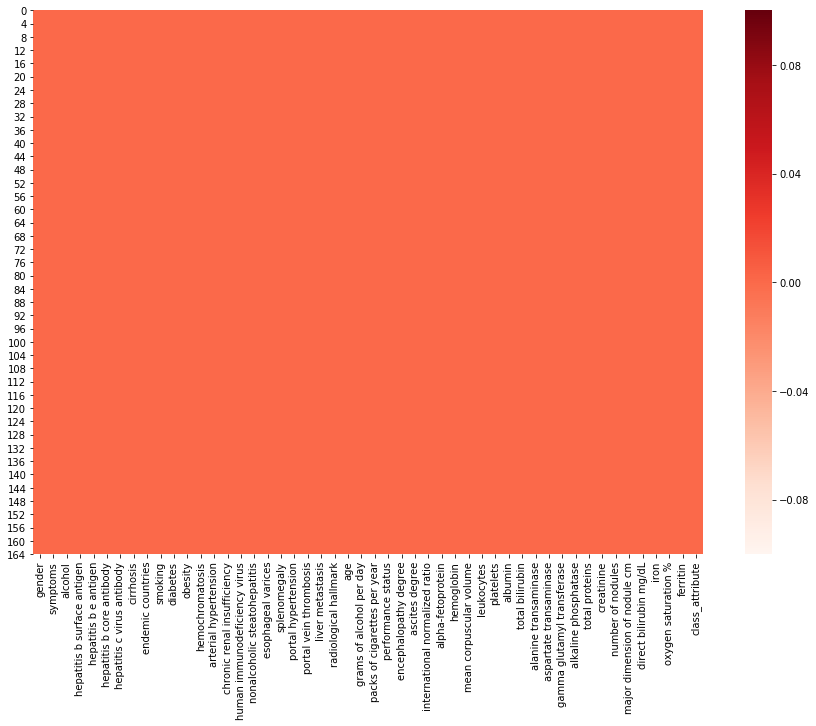

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.isnull(), cbar=True, cmap=plt.cm.Reds)
plt.show()

### Impute missing values using median strategy

In [27]:
imp_median = SimpleImputer(strategy='median', missing_values=np.nan, copy=True)
imp_median.fit(df.values)
mat_median = imp_median.transform(df.values)
df2 = pd.DataFrame(mat_median, columns=df.columns)
df2.sample(5)

gender  symptoms  alcohol  hepatitis b surface antigen  \
71      1.0       1.0      1.0                          0.0   
33      1.0       1.0      1.0                          0.0   
129     0.0       1.0      1.0                          0.0   
133     0.0       1.0      0.0                          0.0   
37      1.0       1.0      1.0                          0.0   

     hepatitis b e antigen  hepatitis b core antibody  \
71                     0.0                        0.0   
33                     0.0                        0.0   
129                    0.0                        0.0   
133                    0.0                        0.0   
37                     0.0                        0.0   

     hepatitis c virus antibody  cirrhosis  endemic countries  smoking  ...  \
71                          0.0        1.0                0.0      1.0  ...   
33                          0.0        1.0                0.0      1.0  ...   
129                         0.0        1.0                0.0      0.0  ...   
133                         0.0        0.0                0.0      0.0  ...   
37                          0.0        1.0                0.0      1.0  ...   

     alkaline phosphatase  total proteins  creatinine  number of nodules  \
71                  417.0             6.5        0.64                5.0   
33                  227.0            16.8        1.72                1.0   
129                 171.0             7.1        0.66                2.0   
133                 587.0             7.2        2.14                5.0   
37                  209.0             6.7        1.40                5.0   

     major dimension of nodule cm  direct bilirubin mg/dL  iron  \
71                           15.0                     1.1  83.0   
33                            5.9                     0.7  83.0   
129                           5.8                     0.7  83.0   
133                          16.0                     0.7  14.0   
37                            4.9                     0.2  57.0   

     oxygen saturation %  ferritin  class_attribute  
71                  27.0     295.0              1.0  
33                  27.0     295.0              1.0  
129                 27.0     295.0              0.0  
133                  5.0     149.0              0.0  
37                  25.0     134.0              0.0  

[5 rows x 50 columns]

In [28]:
print("Columnwise total missing value after median value imputation")
df2.isnull().sum(axis=0)

Columnwise total missing value after median value imputation


gender                            0
symptoms                          0
alcohol                           0
hepatitis b surface antigen       0
hepatitis b e antigen             0
hepatitis b core antibody         0
hepatitis c virus antibody        0
cirrhosis                         0
endemic countries                 0
smoking                           0
diabetes                          0
obesity                           0
hemochromatosis                   0
arterial hypertension             0
chronic renal insufficiency       0
human immunodeficiency virus      0
nonalcoholic steatohepatitis      0
esophageal varices                0
splenomegaly                      0
portal hypertension               0
portal vein thrombosis            0
liver metastasis                  0
radiological hallmark             0
age                               0
grams of alcohol per day          0
packs of cigarettes per year      0
performance status                0
encephalopathy degree       

### Impute missing values using most frequent strategy

In [29]:
imp_mf = SimpleImputer(strategy='most_frequent', missing_values=np.nan, copy=True)
#imp_sb = SimpleImputer(strategy='most_frequent', missing_values='', copy=True)
imp_mf.fit(df.values)
mat_mf = imp_mf.transform(df.values)
df3 = pd.DataFrame(mat_mf, columns=df.columns)
df3.sample(5)

gender  symptoms  alcohol  hepatitis b surface antigen  \
135     0.0       1.0      0.0                          0.0   
54      1.0       1.0      1.0                          0.0   
59      1.0       1.0      0.0                          0.0   
146     1.0       1.0      1.0                          0.0   
160     0.0       0.0      1.0                          0.0   

     hepatitis b e antigen  hepatitis b core antibody  \
135                    0.0                        0.0   
54                     0.0                        0.0   
59                     0.0                        0.0   
146                    0.0                        0.0   
160                    0.0                        0.0   

     hepatitis c virus antibody  cirrhosis  endemic countries  smoking  ...  \
135                         0.0        1.0                0.0      0.0  ...   
54                          1.0        1.0                0.0      1.0  ...   
59                          0.0        0.0                0.0      1.0  ...   
146                         0.0        1.0                0.0      1.0  ...   
160                         1.0        1.0                0.0      1.0  ...   

     alkaline phosphatase  total proteins  creatinine  number of nodules  \
135                 123.0             6.8        0.82                5.0   
54                  397.0             6.7        0.82                1.0   
59                  103.0             6.8        1.24                1.0   
146                 472.0             5.9        2.02                1.0   
160                 109.0             7.6        0.70                5.0   

     major dimension of nodule cm  direct bilirubin mg/dL  iron  \
135                           8.3                     0.3  94.0   
54                            2.1                     5.5  56.0   
59                           10.0                     0.3  94.0   
146                           2.0                     0.6  29.0   
160                           3.0                     0.3  94.0   

     oxygen saturation %  ferritin  class_attribute  
135                 25.0      48.0              1.0  
54                  27.0     742.0              0.0  
59                  25.0      48.0              0.0  
146                  4.0      14.0              0.0  
160                 25.0      48.0              1.0  

[5 rows x 50 columns]

In [30]:
print("Columnwise total missing value afte rmost frequent imputation")
df3.isnull().sum(axis=0)

Columnwise total missing value afte rmost frequent imputation


gender                            0
symptoms                          0
alcohol                           0
hepatitis b surface antigen       0
hepatitis b e antigen             0
hepatitis b core antibody         0
hepatitis c virus antibody        0
cirrhosis                         0
endemic countries                 0
smoking                           0
diabetes                          0
obesity                           0
hemochromatosis                   0
arterial hypertension             0
chronic renal insufficiency       0
human immunodeficiency virus      0
nonalcoholic steatohepatitis      0
esophageal varices                0
splenomegaly                      0
portal hypertension               0
portal vein thrombosis            0
liver metastasis                  0
radiological hallmark             0
age                               0
grams of alcohol per day          0
packs of cigarettes per year      0
performance status                0
encephalopathy degree       

### Impute missing values using iterativeImputer strategy

In [31]:
cols = df.columns
imputer = IterativeImputer()
df4 = pd.DataFrame(imputer.fit_transform(df))
df4.columns = df.columns
df4.index = df.index
df4.isna().sum()
df4.sample(20)

gender  symptoms  alcohol  hepatitis b surface antigen  \
122     1.0  1.000000      1.0                     0.000000   
65      0.0  1.000000      0.0                     0.000000   
131     0.0  0.000000      1.0                     0.081684   
132     0.0  0.000000      0.0                     0.000000   
136     0.0  1.000000      0.0                     0.000000   
6       1.0  0.000000      0.0                     0.000000   
29      1.0  1.000000      1.0                     0.000000   
114     1.0  1.000000      1.0                     0.000000   
82      1.0  0.000000      1.0                     0.000000   
99      1.0  0.000000      1.0                     0.000000   
142     1.0  0.591701      1.0                     0.000000   
133     0.0  1.000000      0.0                     0.036047   
38      1.0  0.000000      1.0                     0.000000   
75      1.0  1.000000      1.0                     0.000000   
58      1.0  0.573914      1.0                     0.000000   
13      1.0  0.514838      0.0                     0.000000   
68      1.0  1.000000      1.0                     0.000000   
39      1.0  1.000000      1.0                     1.000000   
55      0.0  1.000000      0.0                     0.255414   
119     1.0  0.000000      1.0                     0.000000   

     hepatitis b e antigen  hepatitis b core antibody  \
122               0.000000                   1.000000   
65                0.000000                   0.000000   
131               0.031501                   0.247243   
132               0.000000                   0.000000   
136               0.000000                   0.000000   
6                 0.119436                   1.000000   
29               -0.009333                   0.000000   
114               0.000000                   0.000000   
82                0.000000                   0.000000   
99                0.044888                   0.000000   
142               0.000000                   0.000000   
133              -0.043350                   0.086671   
38                0.000000                   0.000000   
75                0.047649                   0.550436   
58                0.000000                   0.000000   
13                0.000000                   0.000000   
68                0.000000                   0.000000   
39                0.000000                   1.000000   
55                0.007823                  -0.010192   
119               0.000000                   0.000000   

     hepatitis c virus antibody  cirrhosis  endemic countries   smoking  ...  \
122                    1.000000        1.0           0.000000  1.000000  ...   
65                     0.000000        1.0           0.000000  0.000000  ...   
131                    0.000000        1.0           0.000000  0.643355  ...   
132                    1.000000        1.0           0.135240  0.000000  ...   
136                    0.000000        0.0           1.000000  1.000000  ...   
6                      1.000000        1.0           0.000000  0.000000  ...   
29                     0.000000        1.0           0.000000  1.000000  ...   
114                    0.000000        1.0           0.000000  0.669313  ...   
82                     0.000000        1.0           0.000000  0.000000  ...   
99                     0.000000        1.0           0.000000  0.000000  ...   
142                    1.000000        1.0           0.000000  0.000000  ...   
133                    0.291968        0.0           0.000000  0.000000  ...   
38                     0.000000        1.0           0.000000  0.000000  ...   
75                     1.000000        1.0          -0.005301  0.710928  ...   
58                     0.000000        1.0           0.000000  0.000000  ...   
13                     1.000000        1.0           0.086147  0.360546  ...   
68                     0.000000        1.0           0.000000  0.000000  ...   
39                     1.000000        1.0 

In [32]:
print("Columnwise total missing value after iterativeImputer imputation")
df4.isnull().sum(axis=0)

Columnwise total missing value after iterativeImputer imputation


gender                            0
symptoms                          0
alcohol                           0
hepatitis b surface antigen       0
hepatitis b e antigen             0
hepatitis b core antibody         0
hepatitis c virus antibody        0
cirrhosis                         0
endemic countries                 0
smoking                           0
diabetes                          0
obesity                           0
hemochromatosis                   0
arterial hypertension             0
chronic renal insufficiency       0
human immunodeficiency virus      0
nonalcoholic steatohepatitis      0
esophageal varices                0
splenomegaly                      0
portal hypertension               0
portal vein thrombosis            0
liver metastasis                  0
radiological hallmark             0
age                               0
grams of alcohol per day          0
packs of cigarettes per year      0
performance status                0
encephalopathy degree       

In [33]:
#split dataset in features and target variable
#feature_cols = ["symptoms","performance status","ascites degree","hemoglobin","albumin", "alkaline phosphatase", "direct bilirubin mg/dL","iron", "ferritin"]
#X_df1 = df1[feature_cols] # Features
#y_df1 = df1.class_attribute # Target variable